In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# read file
df = pd.read_csv("landprice.csv")
x = df.iloc[:,0].values
y = df.iloc[:,1].values
x,y

(array([ 91,  66,  72,  73,  60,  86,  66,  56,  85,  95,  94, 120,  90,
         75, 114, 153,  37, 150,  76, 100,  79,  80,  78], dtype=int64),
 array([12. ,  7. ,  8. ,  8.1,  7. , 11. ,  7. ,  6. , 11. , 12. , 12. ,
        15. , 12. ,  8. , 14. , 19. ,  4. , 19. ,  9. , 13. ,  9.1,  9.3,
        13. ]))

In [3]:
#split the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)
x_train,x_test,y_train,y_test

(array([ 66, 150,  60,  72,  86,  76,  95,  56, 100,  73,  91, 153,  90],
       dtype=int64),
 array([120,  94,  80, 114,  79,  66,  75,  78,  37,  85], dtype=int64),
 array([ 7. , 19. ,  7. ,  8. , 11. ,  9. , 12. ,  6. , 13. ,  8.1, 12. ,
        19. , 12. ]),
 array([15. , 12. ,  9.3, 14. ,  9.1,  7. ,  8. , 13. ,  4. , 11. ]))

In [5]:
# reshaping the data for prediction
x_train1 = np.reshape(x_train,(-1,1))
x_test1 = np.reshape(x_test,(-1,1))
y_train1 = np.reshape(y_train,(-1,1))
y_test1 = np.reshape(y_test,(-1,1))  

x_train1,x_test1,y_train1,y_test1

(array([[ 66],
        [150],
        [ 60],
        [ 72],
        [ 86],
        [ 76],
        [ 95],
        [ 56],
        [100],
        [ 73],
        [ 91],
        [153],
        [ 90]], dtype=int64), array([[120],
        [ 94],
        [ 80],
        [114],
        [ 79],
        [ 66],
        [ 75],
        [ 78],
        [ 37],
        [ 85]], dtype=int64), array([[ 7. ],
        [19. ],
        [ 7. ],
        [ 8. ],
        [11. ],
        [ 9. ],
        [12. ],
        [ 6. ],
        [13. ],
        [ 8.1],
        [12. ],
        [19. ],
        [12. ]]), array([[15. ],
        [12. ],
        [ 9.3],
        [14. ],
        [ 9.1],
        [ 7. ],
        [ 8. ],
        [13. ],
        [ 4. ],
        [11. ]]))

In [6]:
# train the model
lin_regressor = LinearRegression()
lin_regressor.fit(x_train1,y_train1)    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

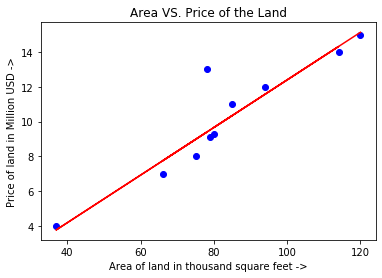

In [14]:
# visualize the plots with regression line

plt.scatter(x_test1,y_test1,color='blue')
plt.plot(x_test1,y_pred,color='red')
plt.title('Area VS. Price of the Land')
plt.xlabel('Area of land in thousand square feet ->')
plt.ylabel('Price of land in Million USD ->')
plt.show()

In [13]:
# predict the values
y_pred = lin_regressor.predict(x_test1) 
x_pred = np.array([[32]])
price_predict = lin_regressor.predict(x_pred)

print(f"Prediction on x_test is : {y_pred}")
print(f"Prediction of price of land when Area of land is 32 thousand sqft: {price_predict[0][0]} million USD")

Prediction on x_test is : [[15.13750793]
 [11.57659548]
 [ 9.65918108]
 [14.31575891]
 [ 9.52222291]
 [ 7.74176669]
 [ 8.97439023]
 [ 9.38526474]
 [ 3.76997972]
 [10.34397194]]
Prediction of price of land when Area of land is 32 thousand sqft: 3.0851888640565095 million USD


In [15]:
# r_square value is (model prediction is that much of accurate)
r_square = r2_score(y_test1,y_pred)
r_square

0.8505174170816574